In [77]:
! pip install yfinance

In [78]:
! pip install tensorflow

In [79]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Fetch data for Reliance Industries (NSE)
ticker = '^NSEI'  # Add '.NS' for NSE stocks and '.BO' for BSE stocks
data = yf.download(ticker, start='2014-01-01', end='2025-03-04')

print(data.head())


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open  Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI   ^NSEI
Date                                                                  
2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100
2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000
2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300
2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600
2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900


## Current Price of NIFTY 50 Index



In [114]:
# Get current market Price
nifty = yf.Ticker("^NSEI")

current_price = nifty.history(period = "1d")["Close"].iloc[-1]

current_price = round(current_price,2)

print(f"Current NIFTY 50 Price : {current_price} Rupees")


Current NIFTY 50 Price : 22320.65 Rupees


### Load The Dataset

In [80]:
data.to_csv('data.csv')
# Load Data
df = pd.read_csv('data.csv')

In [81]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [82]:
# drop 0th and 1st index row
df = df.drop([0,1],axis=0).reset_index(drop=True)
df['Close'] = round(df.Close.astype('float'),2)
df

,Price,Close,High,Low,Open,Volume
0,2014-01-02,6221.15,6358.2998046875,6211.2998046875,6301.25,158100
1,2014-01-03,6211.15,6221.7001953125,6171.25,6194.5498046875,139000
2,2014-01-06,6191.45,6224.7001953125,6170.25,6220.85009765625,118300
3,2014-01-07,6162.25,6221.5,6144.75,6203.89990234375,138600
4,2014-01-08,6174.60,6192.10009765625,6160.35009765625,6178.0498046875,146900
...,...,...,...,...,...,...
2737,2025-02-24,22553.35,22668.05078125,22518.80078125,22609.349609375,214300
2738,2025-02-25,22547.55,22625.30078125,22513.900390625,22516.44921875,250300
2739,2025-02-27,22545.05,22613.30078125,22508.400390625,22568.94921875,289200
2740,2025-02-28,22124.70,22450.349609375,22104.849609375,22433.400390625,551300


In [83]:
df = df.rename(columns={'Price':'Date'})


In [84]:
df.reset_index(drop=True)
df['Date'] = pd.to_datetime(df['Date'])

In [85]:
df = df.set_index(['Date'],drop=True)

<Axes: xlabel='Date'>

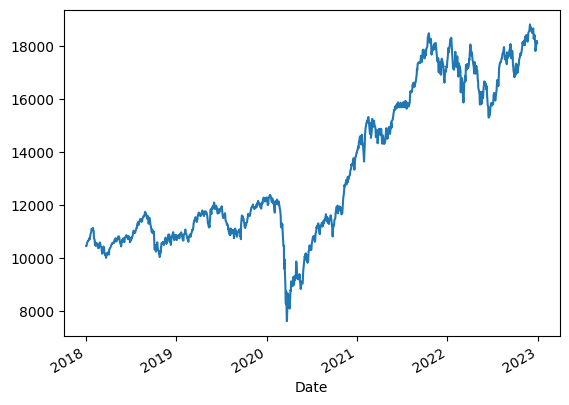

In [86]:
df.loc['2018-01-01':'2022-12-30']['Close'].plot()

### **Step 3: Visualize the Data**

Visualization helps identify trends, seasonality, and patterns.

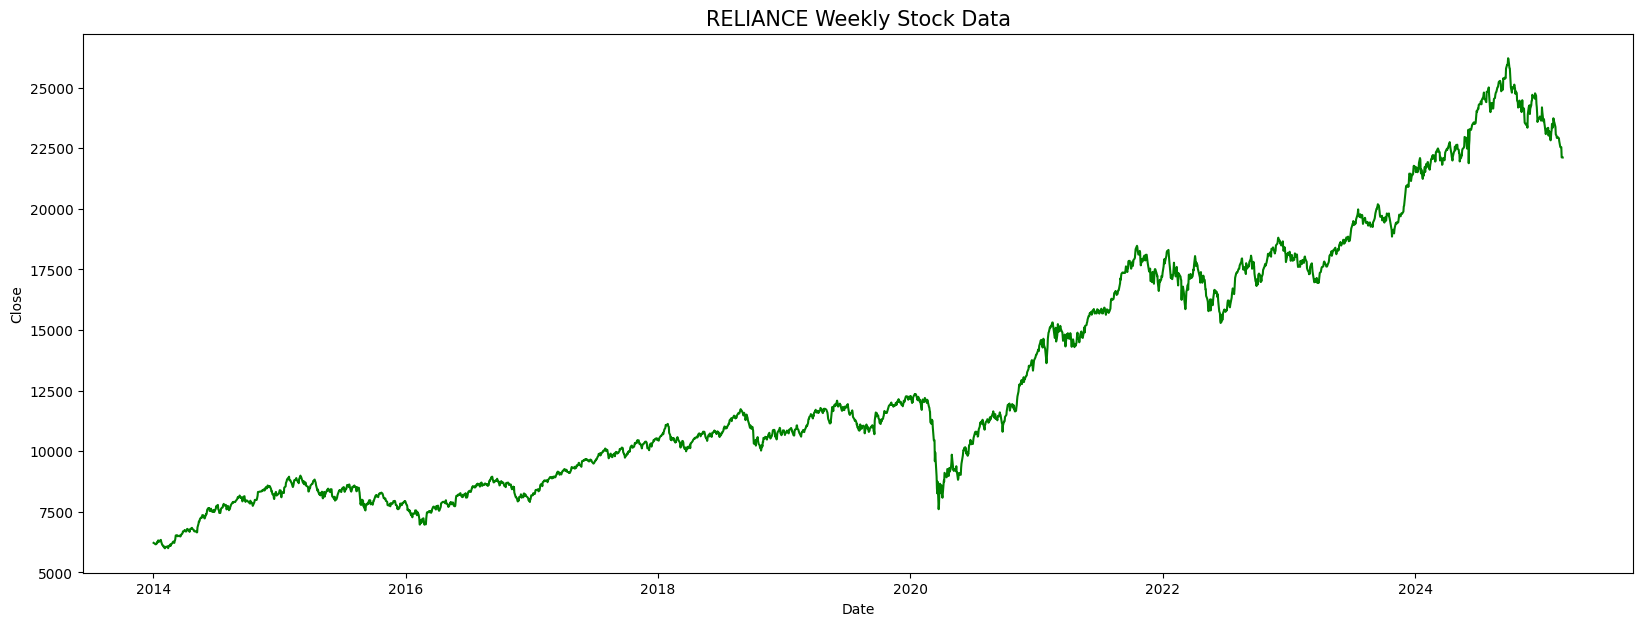

In [87]:
plt.figure(figsize=(20,7))
a = sns.lineplot(x='Date',y='Close',data = df,color='green')
a.set_title("RELIANCE Weekly Stock Data",fontsize=15)
plt.show()

### **Step 4: Decompose the Time Series**

Decompose the data into trend, seasonality, and residual components.

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose
import random
from os import close
import matplotlib.pyplot as plt

## create data for visualize

In [89]:
# Use this:
data = df[['Close']].copy()  # Create a copy to avoid modifying 'df'
data = data.set_index(df.index)  # Set the index of 'data' to the index of 'df'

## Additive Series

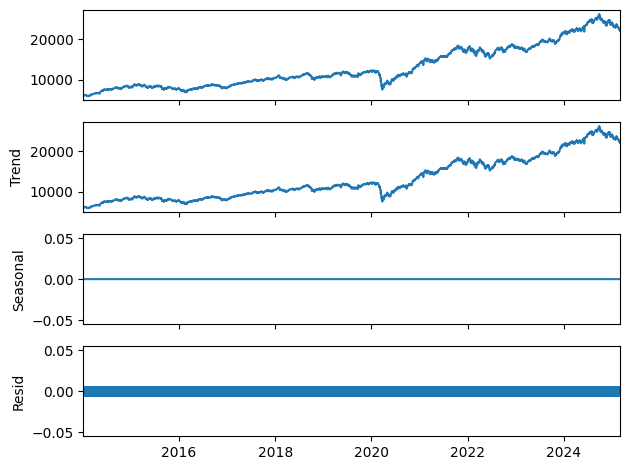

In [90]:
res = seasonal_decompose(data,model="additive",period=1)
res.plot()
plt.show()

## Multiplicative Series

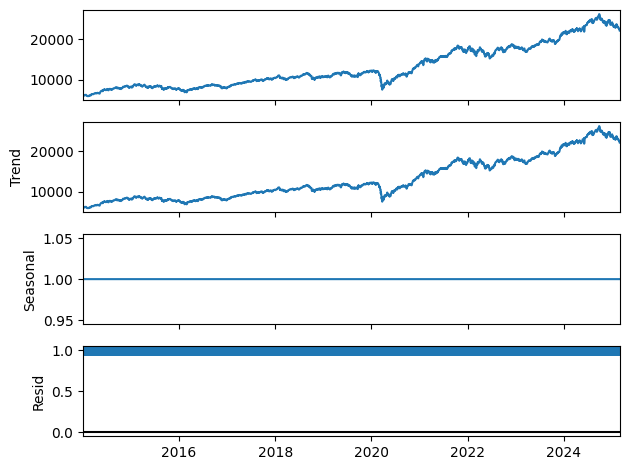

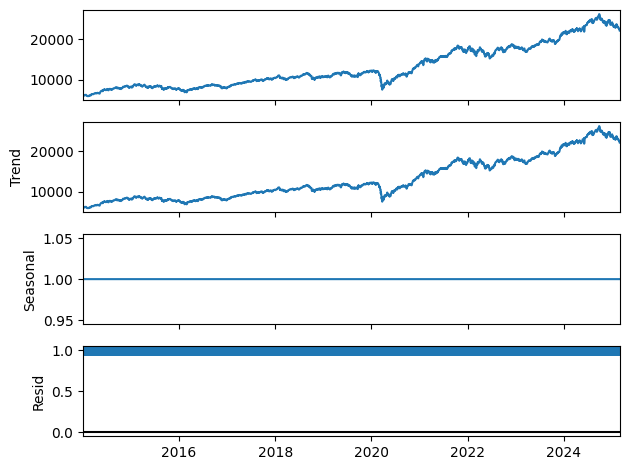

In [91]:
res = seasonal_decompose(data,model="multiplicative",period=1)
res.plot()

In [92]:
df.iloc[0]

,2014-01-02
Close,6221.15
High,6358.2998046875
Low,6211.2998046875
Open,6301.25
Volume,158100


### Normalize

In [93]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_price = scaler.fit_transform(df[['Close']])

In [94]:
def create_dataset(sequance_lenght,data):
  x = []
  y = []
  # Convert the input data to a NumPy array for slicing
  data = np.array(data).reshape(-1, 1)
  for i in range(sequance_lenght,len(data)):
    x.append(data[ i - sequance_lenght:i,0])
    y.append(data[i,0])
  return np.array(x),np.array(y)


In [95]:
sequance_len = 60
X,y = create_dataset(sequance_len,scaled_price)

In [96]:
X.shape

(2682, 60)

In [97]:
X = X.reshape(X.shape[0],X.shape[1])

In [98]:
X.shape

(2682, 60)

### Train Test Split

In [99]:
Train_size = int(len(X)*0.80)
X_train,X_test = X[:Train_size],X[Train_size:]
y_train,y_test = y[:Train_size],y[Train_size:]

In [100]:
X_train.shape

(2145, 60)

## Model training Using Tensorflow.Keras

In [101]:
from tensorflow.keras.models import Sequential # container
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [102]:
# Building an sequential model

model = Sequential()

# Add 1st layer
model.add(LSTM(units = 64,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

# Add 1st layer
model.add(LSTM(units = 64,activation='relu',return_sequences=False))
model.add(Dropout(0.2))

# Add 1st layer
model.add(Dense(units = 1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [103]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [104]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

### train model

In [105]:
model.fit(X_train,y_train,batch_size=16,epochs=20)

Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - loss: 0.0239
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0014
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0013
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0013
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0012
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0011
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 9.0822e-04
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0011
Epoch 9/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 8.2203e-04
Epoch 10/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 8.0897e-04
Epoch 11/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 6.2770e-04
Epoch 12/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0011
Epoch 13/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - loss: 6.4786e-04
Epoch 14/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 6.8573e-04
Epoch 15/20


In [106]:
prediction = model.predict(X_test)
real_pred = scaler.inverse_transform(prediction)
print(real_pred)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
[[18131.297]
 [18102.025]
 [18091.848]
 [18085.889]
 [18092.01 ]
 [18107.379]
 [18109.416]
 [18099.611]
 [18071.088]
 [18058.014]
 [18036.03 ]
 [18010.293]
 [17981.293]
 [17962.916]
 [17946.13 ]
 [17946.838]
 [17967.012]
 [17990.98 ]
 [18008.1  ]
 [18028.31 ]
 [18047.857]
 [18043.72 ]
 [17999.344]
 [17941.36 ]
 [17881.768]
 [17822.518]
 [17769.066]
 [17747.377]
 [17737.178]
 [17731.709]
 [17743.574]
 [17765.828]
 [17788.818]
 [17802.453]
 [17824.352]
 [17855.848]
 [17891.332]
 [17917.428]
 [17926.354]
 [17922.98 ]
 [17886.24 ]
 [17830.64 ]
 [17764.953]
 [17692.854]
 [17615.906]
 [17558.355]
 [17504.88 ]
 [17485.822]
 [17498.107]
 [17531.398]
 [17559.31 ]
 [17565.467]
 [17534.15 ]
 [17474.156]
 [17396.389]
 [17317.02 ]
 [17255.145]
 [17198.453]
 [17162.537]
 [17146.26 ]
 [17136.129]
 [17118.64 ]
 [17103.062]
 [17086.588]
 [17083.584]
 [17114.014]
 [17163.541]
 [17234.012]
 [17313.42 ]
 [17392.846]
 [17473.58 ]
 [17555.078]
 [17630.26 ]
 [17683.062

In [107]:
y_real = scaler.inverse_transform(y_test.reshape(-1,1))

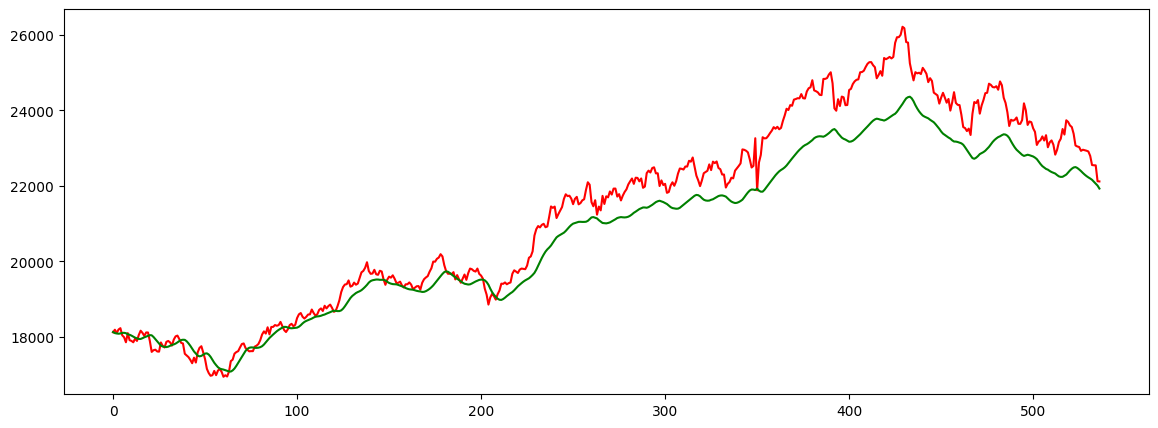

In [108]:
plt.subplots(figsize=(14,5))
plt.plot(y_real,label='actual',color='red')
plt.plot(real_pred,label='predicted',color='green')
plt.show()

In [109]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_real,real_pred)
print(mae)

644.9098536429236


In [110]:
# Save the model
model.save("LSTM_Model.h5")

## **LSTM USING PY-TORCH**

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader

In [ ]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):

    def __init__(self, features, labels):

        # Convert features and labels into tensors
        self.features = torch.tensor(features, dtype=torch.float32).unsqueeze(-1)  # (num_samples, 30, 1)
        self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(-1)  # # (num_samples, 1)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]


In [ ]:
# apply custom dataset class
train_data = CustomDataset(X_train,y_train)
test_data = CustomDataset(X_test,y_test)

In [ ]:
# applying dataloader class
loaded_train = DataLoader(train_data,batch_size = 16,shuffle= True)
loaded_test = DataLoader(test_data,batch_size = 16,shuffle= False)

In [48]:
for batch in loaded_train:

  x_batch,y_batch = batch

  print("X_batch shape:", x_batch.shape)  # (batch_size, 60, 1)
  print("y_batch shape:", y_batch.shape)  # (batch_size, 1)
  break

X_batch shape: torch.Size([16, 60, 1])
y_batch shape: torch.Size([16, 1])


In [49]:
len(train_data)

2120

In [50]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Custom LSTM Neural Network Class
class MyLSTM(nn.Module):

    # Defining constructor
    def __init__(self,input_features):
        # Inherit constructor of parent class
        super(MyLSTM,self).__init__()

        # LSTM Layer 1
        self.feature1 = nn.LSTM(input_size=input_features, hidden_size=64, num_layers=1, batch_first=True)
        self.droupout1 = nn.Dropout(0.3)

         # LSTM Layer 2
        self.feature2 = nn.LSTM(input_size= 64, hidden_size=64, num_layers=1, batch_first=True)
        self.droupout2 = nn.Dropout(0.3)


        # Fully connected layer of classifier
        self.classifier = nn.Linear(64, 1)

    def forward(self, x):

        # LSTM forward pass layer 1
        lstm_out, _ = self.feature1(x)
        lstm_out  = self.droupout1(lstm_out)

        # LSTM forward pass layer 2
        lstm_out, _ = self.feature2(lstm_out)
        lstm_out  = self.droupout2(lstm_out)

        # Take the output from the last time step
        out = lstm_out[:, -1, :]

        # Pass through classifier
        x = self.classifier(out)

        return x


## Creating Object of class

In [51]:
# create object of class
model = MyLSTM(1)

In [52]:
print(model)

MyLSTM(
  (feature1): LSTM(1, 64, batch_first=True)
  (droupout1): Dropout(p=0.3, inplace=False)
  (feature2): LSTM(64, 64, batch_first=True)
  (droupout2): Dropout(p=0.3, inplace=False)
  (classifier): Linear(in_features=64, out_features=1, bias=True)
)


### Defining other parameters

In [53]:
#  Defining number of epochs
epochs = 20

#  Defining  value of learning rate
learning_rate = 0.01

# defining loss - CrossEntropyLoss
criterian = nn.MSELoss()

# Defining Optimizer
optimizer = torch.optim.Adam(params=model.parameters(),lr=learning_rate)

### Trainning Loop

In [54]:
for epoch in range(epochs):
  # Initialize loss value
  total_epoch_loss = 0

  for batch_features,batch_labels in loaded_train:

    # # move to GPU
    #batch_features,batch_labels = batch_features.to(device),batch_labels.to(device)

    # forward propagation
    outputs = model.forward(batch_features)

    # calculate loss
    loss = criterian(outputs,batch_labels)

    # zero gradient
    optimizer.zero_grad()

    # backward propagation
    loss.backward()

    # upadate parameters by using optimizer
    optimizer.step()

    # Print Loss
    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(loaded_train)
  # Print Loss
  print(f"Epoch : {epoch + 1} & Loss : {avg_loss}")



Epoch : 1 & Loss : 0.0064643275378275435
Epoch : 2 & Loss : 0.0017310840699601134
Epoch : 3 & Loss : 0.0011533455429966317
Epoch : 4 & Loss : 0.0020459775613354786
Epoch : 5 & Loss : 0.0010797568659046035
Epoch : 6 & Loss : 0.0010487369837850345
Epoch : 7 & Loss : 0.0010606932247677271
Epoch : 8 & Loss : 0.0010782059227795642
Epoch : 9 & Loss : 0.0010241847814636696
Epoch : 10 & Loss : 0.0014623737626155851
Epoch : 11 & Loss : 0.0010107670719402709
Epoch : 12 & Loss : 0.0008665538053562221
Epoch : 13 & Loss : 0.0008382143043996976
Epoch : 14 & Loss : 0.0010744185869440198
Epoch : 15 & Loss : 0.0009479282928903805
Epoch : 16 & Loss : 0.0010827391877108695
Epoch : 17 & Loss : 0.0009893527879428707
Epoch : 18 & Loss : 0.0007645755985890046
Epoch : 19 & Loss : 0.0010457305865462071
Epoch : 20 & Loss : 0.0009299565737505086


In [ ]:
model.eval()

In [ ]:
# Evaluation code for regression task
criterian = nn.MSELoss()
total_loss = 0
with torch.no_grad():  # Disable gradient calculation for inference
    for batch_features, batch_labels in loaded_test:

        # Move data to GPU
        #batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        # Forward pass
        outputs = model(batch_features)

        # Calculate loss (e.g., MSE or other regression loss)
        loss = criterian(outputs, batch_labels)  # Assuming `criterion` is MSELoss or similar
        total_loss += loss.item()

# Print average loss
average_loss = total_loss / len(loaded_test)
print(f'Average Loss: {average_loss:.4f}')
print(outputs)


In [ ]:
def predict(model,input_tensor):
  model.eval()

  # convert input to PyTorch tensor
  input_tensor = torch.tensor(input_tensor, dtype=torch.float32).unsqueeze(-1)

  with torch.no_grad():
    output = model(input_tensor)

  return output

In [58]:
y_test.shape

(530,)